# IIMT2641 Assignment 5
## Sibo Ding
## Spring 2023

# Q1 Tree Models
## Load the Data

In [1]:
import pandas as pd

state = pd.read_csv('StateData.csv')
print('First 5 rows:\n', state.head())
print('\nNumber of observations and variables:', state.shape)
print('\nNames of variables:', state.columns)

First 5 rows:
    Population  Income  Illiteracy  LifeExp  Murder  HighSchoolGrad  Frost  \
0        3615    3624         2.1    69.05    15.1            41.3     20   
1         365    6315         1.5    69.31    11.3            66.7    152   
2        2212    4530         1.8    70.55     7.8            58.1     15   
3        2110    3378         1.9    70.66    10.1            39.9     65   
4       21198    5114         1.1    71.71    10.3            62.6     20   

     Area  Longitude  Latitude Region  
0   50708   -86.7509   32.5901  South  
1  566432  -127.2500   49.2500   West  
2  113417  -111.6250   34.2192   West  
3   51945   -92.2992   34.7336  South  
4  156361  -119.7730   36.5341   West  

Number of observations and variables: (50, 11)

Names of variables: Index(['Population', 'Income', 'Illiteracy', 'LifeExp', 'Murder',
       'HighSchoolGrad', 'Frost', 'Area', 'Longitude', 'Latitude', 'Region'],
      dtype='object')


In [2]:
# Since sklearn.tree can only handle numerical data, change categorical data to numerical data
dict_region = {'North Central': 0, 'Northeast': 1, 'South': 2, 'West': 3}
state['Region'] = state['Region'].map(dict_region)
state.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,2
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,3
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,3
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,2
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,3


## Train-test Split

In [3]:
from sklearn.model_selection import train_test_split

# Randomly split the dataset with 70% in the training set
x = state[['Population', 'Income', 'Illiteracy', 'Murder','HighSchoolGrad',
           'Frost', 'Area', 'Longitude', 'Latitude', 'Region']]
y = state['LifeExp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

## 7-variable Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

X = x_train[['Population', 'Murder', 'Frost', 'Income',
             'Illiteracy', 'Area', 'HighSchoolGrad']]
lm1 = LinearRegression().fit(X, y_train)

X = x_test[['Population', 'Murder', 'Frost', 'Income',
            'Illiteracy', 'Area', 'HighSchoolGrad']]
lm1_pred = lm1.predict(X)
# Out-of-sample R^2
SSE = sum((y_test - lm1_pred) ** 2)
SST = sum((y_test - y_train.mean()) ** 2)
R2_lm1 = 1 - SSE/SST
R2_lm1

0.4292521406943074

## 4-variable Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

X = x_train[['Population', 'Murder', 'Frost', 'HighSchoolGrad']]
lm2 = LinearRegression().fit(X, y_train)

X = x_test[['Population', 'Murder', 'Frost', 'HighSchoolGrad']]
lm2_pred = lm2.predict(X)
# Out-of-sample R^2
SSE = sum((y_test - lm2_pred) ** 2)
SST = sum((y_test - y_train.mean()) ** 2)
R2_lm2 = 1 - SSE/SST
R2_lm2

0.505491754731523

By removing independent variables, the $R^2$ on the test test is increased, meaning the overfitting problem is alleviated. The equivalent procedure in CART is pruning to have a smaller tree.

## CART Model

[Text(0.5, 0.875, 'Murder <= 6.55\nsquared_error = 2.079\nsamples = 35\nvalue = 70.844'),
 Text(0.25, 0.625, 'Income <= 4427.5\nsquared_error = 0.771\nsamples = 14\nvalue = 72.119'),
 Text(0.125, 0.375, 'squared_error = 0.651\nsamples = 7\nvalue = 71.551'),
 Text(0.375, 0.375, 'squared_error = 0.245\nsamples = 7\nvalue = 72.687'),
 Text(0.75, 0.625, 'Murder <= 10.85\nsquared_error = 1.144\nsamples = 21\nvalue = 69.994'),
 Text(0.625, 0.375, 'HighSchoolGrad <= 52.75\nsquared_error = 0.436\nsamples = 13\nvalue = 70.598'),
 Text(0.5, 0.125, 'squared_error = 0.166\nsamples = 6\nvalue = 70.192'),
 Text(0.75, 0.125, 'squared_error = 0.403\nsamples = 7\nvalue = 70.947'),
 Text(0.875, 0.375, 'squared_error = 0.734\nsamples = 8\nvalue = 69.011')]

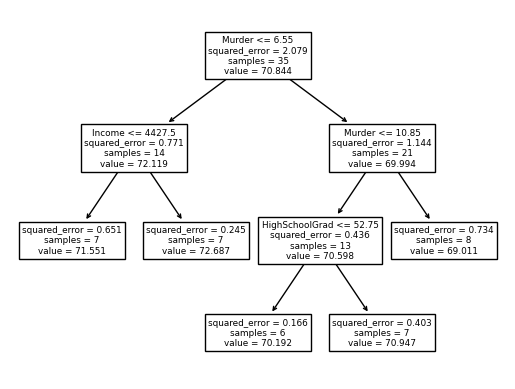

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

features = ['Population', 'Murder', 'Frost', 'Income', 
            'Illiteracy', 'Area', 'HighSchoolGrad']
X = x_train[features]
rtree = DecisionTreeRegressor(min_samples_leaf=5).fit(X, y_train)

plot_tree(rtree, feature_names=features) # Plot the tree

Independent variables `Murder`, `Income`, and `HighSchoolGrad` appear in the tree. The CART model is easier to interpret.

## CART Prediction

In [7]:
rtree_pred = rtree.predict(x_test[features])
# Out-of-sample R^2
SSE = sum((y_test - rtree_pred) ** 2)
SST = sum((y_test - y_train.mean()) ** 2)
R2_rtree = 1 - SSE/SST
R2_rtree

-0.5113086998168672

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor

X = x_train[['Population', 'Murder', 'Frost', 'Income', 
             'Illiteracy', 'Area', 'HighSchoolGrad']]
rf = RandomForestRegressor(
    n_estimators=100, min_samples_leaf=5, random_state=1234).fit(X, y_train)

rf_pred = rf.predict(x_test[['Population', 'Murder', 'Frost', 'Income', 
                             'Illiteracy', 'Area', 'HighSchoolGrad']])
# Out-of-sample R^2
SSE = sum((y_test - rf_pred) ** 2)
SST = sum((y_test - y_train.mean()) ** 2)
R2_rf = 1 - SSE/SST
R2_rf

0.2875925350215973

## Best Model

In [9]:
# Out-of-sample R^2
pd.Series({'7-variable lm': [R2_lm1], '4-variable lm': [R2_lm2],
           'Tree': [R2_rtree], 'Random Forest': [R2_rf]})

7-variable lm     [0.4292521406943074]
4-variable lm      [0.505491754731523]
Tree             [-0.5113086998168672]
Random Forest     [0.2875925350215973]
dtype: object

The 4-variable linear regression model has the largest out-of-sample $R^2$. The tree model is the easiest to interpret.

# Q2 Clustering

In [10]:
bow = pd.read_csv('DailyKos.csv')

## Hierarchical Clustering

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [33.75, 33.75, 72.5, 72.5],
  [15.0, 15.0, 53.125, 53.125],
  [5.0, 5.0, 34.0625, 34.0625],
  [125.0, 125.0, 135.0, 135.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [130.0, 130.0, 154.375, 154.375],
  [115.0, 115.0, 142.1875, 142.1875],
  [225.0, 225.0, 235.0, 235.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [265.0, 265.0, 284.6875, 284.6875],
  [255.0, 255.0, 274.84375, 274.84375],
  [245.0, 245.0, 264.921875, 264.921875],
  [230.0, 230.0, 254.9609375, 254.9609375],
  [215.0, 215.0, 242.48046875, 242.48046875],
  [205.0, 205.0, 228.740234375, 228.740234375],
  [195.0, 195.0, 216.8701171875, 216.8701171875],
  [128.59375, 

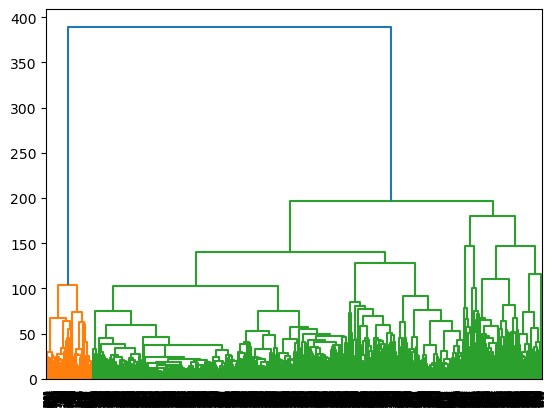

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

hbow = linkage(bow, method='ward', metric='euclidean')
dendrogram(hbow)

Euclidean distance metrics is used to calculate distances.
Hierarchical clustering takes lot of time because in each recursion, it calculates the distance of all combinations between every two data points.

### Choose the Number of Clusters
10 clusters are recommended for different categories of articles. 

In [12]:
from sklearn.cluster import AgglomerativeClustering

no_clusters = 10
h_10clust = AgglomerativeClustering(
    n_clusters=no_clusters, metric='euclidean', linkage='ward').fit_predict(bow)

df_bow_h_10clust = pd.concat([
    pd.DataFrame(h_10clust, columns=['h_10clust']), 
    bow], axis = 1)
# No. of observations in each cluster
df_bow_h_10clust.groupby('h_10clust').size()

h_10clust
0     324
1     461
2    1761
3      13
4     136
5      55
6      50
7     342
8     154
9     134
dtype: int64

### Split the Clusters and Analyze Each Cluster

In [13]:
# Split the dataset into a dataset for each cluster
# Find the six most frequent words in each cluster
no_clusters = 10
for i in range(no_clusters):
    print(df_bow_h_10clust[df_bow_h_10clust['h_10clust'] == i]\
          .drop(columns='h_10clust')\
          .mean(axis=0)\
          .sort_values(ascending=False)\
          .head(6),
          '\n')

november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
democrat      2.858025
bush          2.858025
dtype: float64 

poll        3.349241
kerry       2.787419
bush        2.127983
dean        1.624729
democrat    1.258134
clark       1.138829
dtype: float64 

bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64 

bush        23.769231
iraq         6.461538
kerry        5.538462
vote         4.615385
percent      4.153846
presided     4.076923
dtype: float64 

bush              6.698529
administration    3.220588
presided          2.102941
house             1.750000
year              1.683824
time              1.683824
dtype: float64 

dean         12.309091
kerry         5.345455
democrat      3.545455
edward        2.818182
candidate     2.727273
gephardt      2.672727
dtype: float64 

democrat      12.38
parties        6.34
state          5.74
repu

There is a cluster that is mostly about the Iraq war. There are several clusters that are mostly about the democratic party.

## K-means Clustering

In [14]:
from sklearn.cluster import KMeans

no_clusters = 10
k_10clust = KMeans(
    n_clusters=no_clusters, random_state=23).fit_predict(bow)

df_bow_k_10clust = pd.concat([
    pd.DataFrame(k_10clust, columns=['k_10clust']), 
    bow], axis = 1)
# No. of observations in each cluster
df_bow_k_10clust.groupby('k_10clust').size()

c:\Users\22447\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k_10clust
0      91
1     200
2     341
3    1473
4      62
5      48
6     176
7     326
8     491
9     222
dtype: int64

In [15]:
# Split the dataset into a dataset for each cluster
# Find the six most frequent words in each cluster
no_clusters = 10
for i in range(no_clusters):
    print(df_bow_k_10clust[df_bow_k_10clust['k_10clust'] == i]\
          .drop(columns='k_10clust')\
          .mean(axis=0)\
          .sort_values(ascending=False)\
          .head(6),
          '\n')

bush              13.175824
presided           3.098901
administration     2.912088
house              1.978022
iraq               1.923077
kerry              1.890110
dtype: float64 

iraq        4.675
war         3.470
bush        2.615
iraqi       2.065
american    2.060
official    1.615
dtype: float64 

democrat      2.912023
republican    2.853372
elect         1.923754
state         1.888563
senate        1.668622
parties       1.648094
dtype: float64 

bush        0.693822
democrat    0.537678
poll        0.505092
elect       0.498303
general     0.469790
kerry       0.443313
dtype: float64 

dean         12.548387
kerry         5.564516
democrat      3.403226
campaign      3.000000
clark         2.596774
candidate     2.580645
dtype: float64 

democrat      13.625000
parties        6.145833
republican     5.687500
state          5.541667
seat           3.937500
senate         3.750000
dtype: float64 

kerry       7.812500
bush        7.750000
poll        4.227273
percent     1

Overall, these two groups of clusters have very similar keywords, like "bush", "kerry", "republican", "november", "iraq", etc.
1 cluster starting with "november" among 10 clusters is identical with hierarchical clustering.